In [ ]:
using MLDatasets
using Flux: unsqueeze
using Random
using Plots

using Revise
using ResNet

include("train.jl")

In [1]:
train_x, train_y = FashionMNIST(; Tx=Float32, split=:train)[1:5000]
test_x, test_y = FashionMNIST(; Tx=Float32, split=:test)[1:1000]

print("Training/test set size: $(length(train_y))/$(length(test_y))")

Training/test set size: 5000/1000

In [2]:
Random.seed!(0)

train_x = unsqueeze(train_x, 3)
test_x = unsqueeze(test_x, 3)

indices = randperm(length(test_y))
mid = length(test_y) ÷ 2
val_indices = indices[1:mid]
test_indices = indices[mid + 1:end]

val_x = selectdim(test_x, 4, val_indices)
val_y = test_y[val_indices]

test_x = selectdim(test_x, 4, test_indices)
test_y = test_y[test_indices]

print("Test set has been split into validation and test sets at a ratio of $(length(val_y)):$(length(test_y))")

Test set has been split into validation and test sets at a ratio of 500:500

In [5]:
rn = RN(
    block = BasicBlock,
    channels = [4, 4, 4], 
    strides = [2, 2], 
    repeats = [1, 1], 
    grayscale = true,
    classes = 10
)

ResNet with 9 layers and 2632 parameters

Entry
    Conv((3, 3), 1 => 4, pad=1, bias=false)
    BatchNorm(4, relu)
Layer1
    BasicBlock(4 => 4, 2)
Layer2
    BasicBlock(4 => 4, 2)
Head
    AdaptiveMeanPool((7, 7))
    flatten
    Dense(196 => 10; bias=false)
    BatchNorm(10)
    logsoftmax


In [6]:
epochs = 10

(train_losses, train_accs), (val_losses, val_accs) = train!(
    rn, 
    (train_x, train_y), 
    (val_x, val_y), 
    0.01,
    epochs
);

((Float32[0.7636374, 0.5838355, 0.50226843, 0.4216196, 0.4401461, 0.39303747, 0.35751888, 0.34481958, 0.32742262, 0.3372851], Float32[0.0162, 0.0104, 0.0076, 0.0056, 0.0072, 0.0044, 0.0054, 0.003, 0.0044, 0.0032]), (Float32[0.8486643, 0.7127084, 0.6101637, 0.5588316, 0.55730504, 0.5348825, 0.54785675, 0.49676841, 0.4925575, 0.5341956], Float32[0.024, 0.012, 0.012, 0.006, 0.004, 0.004, 0.006, 0.002, 0.004, 0.002]))

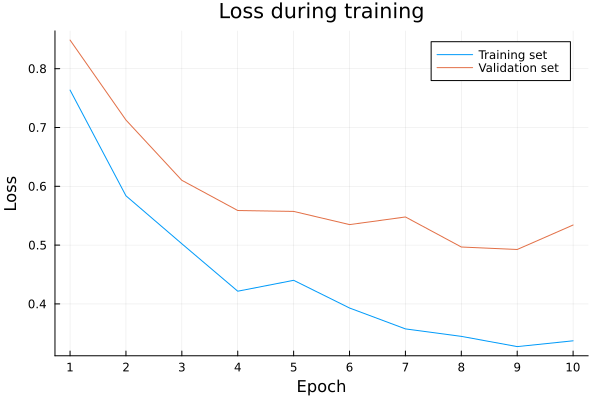

In [7]:
plot([train_losses, val_losses];
    title = "Loss during training",
    label = ["Training set" "Validation set"],
    xguide = "Epoch",
    yguide = "Loss",
    xticks = 1:epochs,
)

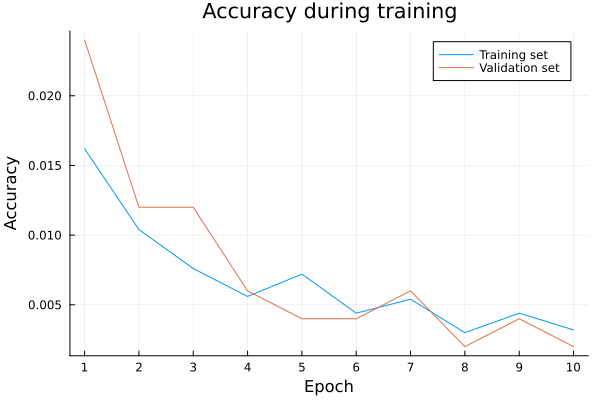

In [8]:
plot([train_accs, val_accs];
    title = "Accuracy during training",
    label = ["Training set" "Validation set"],
    xguide = "Epoch",
    yguide = "Accuracy",
    xticks = 1:epochs,
)

In [9]:
test_acc = accuracy(rn(test_x), test_y)
print("Test accuracy: ", test_acc)

Test accuracy: 0.002